In [1]:
import scipy.spatial
import numpy as np
import re

In [2]:
t = list()
with open("sentences.txt", "r") as file:
    sentences = file.readlines()
for sentence in sentences:
    t.append([word for word in re.split('[^a-z]', sentence.lower()) if word != ''])
len(t)    

22

In [3]:
words = dict()
i = 0
for sentence in t:
    for word in sentence:
        if word not in words:
            words[word] = i
            i += 1
len(words)            

254

In [4]:
matrix = np.zeros((len(t), len(words)))
for i in range(0, len(t)):
    for word in t[i]:
        matrix[i][words[word]] += 1

In [5]:
matrix

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  1.]])

In [6]:
distances = list()
for i in range(len(sentences)):
    distances.append((i, scipy.spatial.distance.cosine(matrix[0], matrix[i])))

sorted_list = sorted(distances, key=lambda tup: tup[1])

print sorted_list[1][0], sorted_list[2][0]

6 4


In [32]:
def f (x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
x = np.array([1, 4, 8, 10, 15])
n = 1
A1 = [
    [x[0] ** i for i in range(0, n+1)],
    [x[4] ** i for i in range(0, n+1)]
]
B1 = [f(x[0]), f(x[4])]
scipy.linalg.solve(A1, B1)

array([ 3.43914511, -0.18692825])

In [33]:
n = 2
A1 = [
    [x[0] ** i for i in range(0, n+1)],
    [x[2] ** i for i in range(0, n+1)],
    [x[4] ** i for i in range(0, n+1)]
]
B1 = [f(x[0]), f(x[2]), f(x[4])]
scipy.linalg.solve(A1, B1)

array([ 3.32512949, -0.06531159, -0.00760104])

In [37]:
n = 3
A1 = [
    [x[0] ** i for i in range(0, n+1)],
    [x[1] ** i for i in range(0, n+1)],
    [x[3] ** i for i in range(0, n+1)],
    [x[4] ** i for i in range(0, n+1)]
]
B1 = [f(x[0]), f(x[1]), f(x[3]), f(x[4])]
ans = scipy.linalg.solve(A1, B1)
map(lambda x: x.round(2), ans)

[4.3600000000000003, -1.3, 0.19, -0.01]

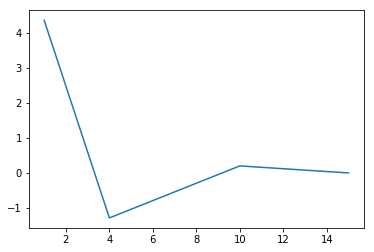

In [38]:
from matplotlib import pylab as plt
plt.plot([x[0], x[1], x[3], x[4]], ans)
plt.show()

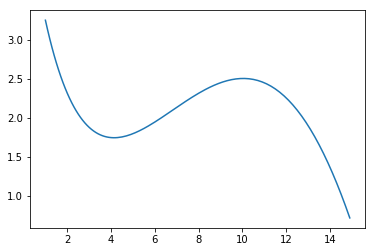

In [36]:
x1 = np.arange(1, 15, 0.1)
y = f(x1)
plt.plot(x1, y)
plt.show()

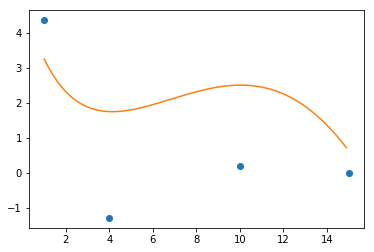

In [40]:
plt.plot([x[0], x[1], x[3], x[4]], ans, 'o', x1, y, '-')
plt.show()